<a href="https://colab.research.google.com/github/dhami2518/Book_Data_Analysis/blob/main/Books_rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions :
1. Read in the CSV using Pandas

2. Remove unnecessary columns from the DataFrame so that only the following columns remain: isbn, original_publication_year, original_title, authors, ratings_1, ratings_2, ratings_3, ratings_4, and ratings_5

3. Rename the columns to the following: ISBN, Publication Year, Original Title, Authors, One Star Reviews, Two Star Reviews, Three Star Reviews, Four Star Reviews, and Five Star Reviews

4. Create new column named "Total Reviews" which has the total number of reviews for each book


5. Create new column named "Average rating" and calculate the average rating for each book

Note: The average rating is a weighted average where each star rating is multiplied by the number of reviews for that rating, summed up, and then divided by the total number of reviews.


6. Use the apply function to create a new column that classifies books based on their average rating

    We'll classify the books into categories:

    'Excellent' for average ratings of 4.5 and above
    'Good' for average ratings between 3.5 and 4.5
    'Average' for average ratings between 2.5 and 3.5
    'Poor' for average ratings below 2.5


7. Write the updated DataFrame into a new CSV file
8. Using the modified DataFrame that was created earlier, create a summary table for the dataset that includes the following pieces of information...



1.   The count of unique authors within the DataFrame
2.   The year of the latest published book in the DataFrame
3.   Find the book with the highest average rating
4.   Find the book with the most total reviews
5.   Top 3 authors with the highest average ratings
6.   Top 3 books with the highest total reviews
7.   Calculate the percentage of books with more one-star reviews than five-star reviews
8.   Calculate the percentage of books with an average rating above a certain threshold

    Example,
    Threshold: 4.0


# Visualize the below questions for different types of plots of your choice.
9.  Distribution of Average Ratings
10. Top 10 Books by Total Reviews
11. Distribution of Book Classifications
12. Top Authors by Average Rating (Top 10)






In [1]:
#load the pandas library
import pandas as pd
df = pd.read_csv("/content/sample_data/Book Analysis data/books.csv")
df.head()
# df.tail()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [2]:
columns_to_keep = ['isbn', 'original_publication_year', 'original_title', 'authors',
                   'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']
df = df[columns_to_keep]

# 3. Rename the columns
new_column_names = {
    'isbn': 'ISBN',
    'original_publication_year': 'Publication Year',
    'original_title': 'Original Title',
    'authors': 'Authors',
    'ratings_1': 'One Star Reviews',
    'ratings_2': 'Two Star Reviews',
    'ratings_3': 'Three Star Reviews',
    'ratings_4': 'Four Star Reviews',
    'ratings_5': 'Five Star Reviews'
}
df = df.rename(columns=new_column_names)
df

,ISBN,Publication Year,Original Title,Authors,One Star Reviews,Two Star Reviews,Three Star Reviews,Four Star Reviews,Five Star Reviews
0,439023483,2008.0,The Hunger Games,Suzanne Collins,66715,127936,560092,1481305,2706317
1,439554934,1997.0,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Mary GrandPré",75504,101676,455024,1156318,3011543
2,316015849,2005.0,Twilight,Stephenie Meyer,456191,436802,793319,875073,1355439
3,61120081,1960.0,To Kill a Mockingbird,Harper Lee,60427,117415,446835,1001952,1714267
4,743273567,1925.0,The Great Gatsby,F. Scott Fitzgerald,86236,197621,606158,936012,947718
...,...,...,...,...,...,...,...,...,...
9995,441019455,2010.0,Bayou Moon,Ilona Andrews,105,575,3538,7860,6778
9996,067973371X,1990.0,Means of Ascent,Robert A. Caro,303,551,1737,3389,6972
9997,039330762X,1977.0,The Mauritius Command,Patrick O'Brian,11,111,1191,4240,5180
9998,61711527,2011.0,Cinderella Ate My Daughter: Dispatches from th...,Peggy Orenstein,275,1002,3765,4577,2375


In [3]:
df['Total Reviews'] = df['One Star Reviews'] + df['Two Star Reviews'] + df['Three Star Reviews'] + df['Four Star Reviews'] + df['Five Star Reviews']
df

,ISBN,Publication Year,Original Title,Authors,One Star Reviews,Two Star Reviews,Three Star Reviews,Four Star Reviews,Five Star Reviews,Total Reviews
0,439023483,2008.0,The Hunger Games,Suzanne Collins,66715,127936,560092,1481305,2706317,4942365
1,439554934,1997.0,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Mary GrandPré",75504,101676,455024,1156318,3011543,4800065
2,316015849,2005.0,Twilight,Stephenie Meyer,456191,436802,793319,875073,1355439,3916824
3,61120081,1960.0,To Kill a Mockingbird,Harper Lee,60427,117415,446835,1001952,1714267,3340896
4,743273567,1925.0,The Great Gatsby,F. Scott Fitzgerald,86236,197621,606158,936012,947718,2773745
...,...,...,...,...,...,...,...,...,...,...
9995,441019455,2010.0,Bayou Moon,Ilona Andrews,105,575,3538,7860,6778,18856
9996,067973371X,1990.0,Means of Ascent,Robert A. Caro,303,551,1737,3389,6972,12952
9997,039330762X,1977.0,The Mauritius Command,Patrick O'Brian,11,111,1191,4240,5180,10733
9998,61711527,2011.0,Cinderella Ate My Daughter: Dispatches from th...,Peggy Orenstein,275,1002,3765,4577,2375,11994


In [4]:
#Create new column named "Average rating" and calculate the average of book
df['Average rating'] = (df['One Star Reviews'] * 1 + df['Two Star Reviews'] * 2 + df['Three Star Reviews'] * 3 + df['Four Star Reviews'] * 4 + df['Five Star Reviews'] * 5) / df['Total Reviews']
df

,ISBN,Publication Year,Original Title,Authors,One Star Reviews,Two Star Reviews,Three Star Reviews,Four Star Reviews,Five Star Reviews,Total Reviews,Average rating
0,439023483,2008.0,The Hunger Games,Suzanne Collins,66715,127936,560092,1481305,2706317,4942365,4.341984
1,439554934,1997.0,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Mary GrandPré",75504,101676,455024,1156318,3011543,4800065,4.443047
2,316015849,2005.0,Twilight,Stephenie Meyer,456191,436802,793319,875073,1355439,3916824,3.571067
3,61120081,1960.0,To Kill a Mockingbird,Harper Lee,60427,117415,446835,1001952,1714267,3340896,4.254818
4,743273567,1925.0,The Great Gatsby,F. Scott Fitzgerald,86236,197621,606158,936012,947718,2773745,3.887376
...,...,...,...,...,...,...,...,...,...,...,...
9995,441019455,2010.0,Bayou Moon,Ilona Andrews,105,575,3538,7860,6778,18856,4.094134
9996,067973371X,1990.0,Means of Ascent,Robert A. Caro,303,551,1737,3389,6972,12952,4.248919
9997,039330762X,1977.0,The Mauritius Command,Patrick O'Brian,11,111,1191,4240,5180,10733,4.347899
9998,61711527,2011.0,Cinderella Ate My Daughter: Dispatches from th...,Peggy Orenstein,275,1002,3765,4577,2375,11994,3.648241


In [5]:
def classify_rating(rating):
    if rating >= 4.5:
        return 'Excellent'
    elif rating >= 3.5:
        return 'Good'
    elif rating >= 2.5:
        return 'Average'
    else:
        return 'Poor'

df['Classification'] = df['Average rating'].apply(classify_rating)
# print("RESULTANT OUTPUT : =============> \n",df)

# updated DataFrame into a new CSV file
df.to_csv("/content/sample_data/Book Analysis data/book_modified.csv",index=False)

In [6]:
#1 : The count of unique authors within the DataFrame
print("The count of unique authors within the DataFrame : ",len(df['Authors'].unique()))
# print("The count of unique authors within the DataFrame : ",df['Authors'].nunique())

The count of unique authors within the DataFrame :  4664


In [7]:
#2 : The year of the latest published book in the DataFrame
print("The year of the latest published book in the DataFrame : ",df['Publication Year'].max())

The year of the latest published book in the DataFrame :  2017.0


In [8]:
#3 Find the book with the highest average rating
highest_avg_rating_book = df[df['Average rating'] == df['Average rating'].max()]
print(f"Find the book with the highest average rating: {highest_avg_rating_book['Original Title'].values[0]} ({highest_avg_rating_book['Average rating'].values[0]})")

Find the book with the highest average rating: The Complete Calvin and Hobbes (4.818306193272824)


In [9]:
# 8.4 Find the book with the most total reviews
most_total_reviews_book = df[df['Total Reviews'] == df['Total Reviews'].max()]
print(f"Find the book with the most total reviews: {most_total_reviews_book['Original Title'].values[0]} ({most_total_reviews_book['Total Reviews'].values[0]})")

Find the book with the most total reviews: The Hunger Games (4942365)


In [10]:
#5 Top 3 authors with the highest average ratings
top_3_authors = df.groupby('Authors')['Average rating'].mean().sort_values(ascending=False).head(3)
print("Top 3 authors with the highest average ratings:")
for author, rating in top_3_authors.items():
    print(f"{author} ({rating})")

Top 3 authors with the highest average ratings:
Anonymous, Lane T. Dennis, Wayne A. Grudem (4.763724035608309)
Bill Watterson (4.711217616874207)
Anonymous, Ronald A. Beers, Ronald A. Beers (4.667727088127792)


In [11]:
#6 Top 3 books with the highest total reviews
top_3_books = df.sort_values(by='Total Reviews', ascending=False).head(3)
print("Top 3 books with the highest total reviews:")
for index, row in top_3_books.iterrows():
    print(f"{row['Original Title']} ({row['Total Reviews']})")

Top 3 books with the highest total reviews:
The Hunger Games (4942365)
Harry Potter and the Philosopher's Stone (4800065)
Twilight (3916824)


In [12]:
# 8.7 Calculate the percentage of books with more one-star reviews than five-star reviews
more_one_star_reviews_percentage = (df['One Star Reviews'] > df['Five Star Reviews']).mean() * 100
print(f"Calculate the percentage of books with more one-star reviews than five-star reviews: {more_one_star_reviews_percentage:.2f}")

Calculate the percentage of books with more one-star reviews than five-star reviews: 0.15


In [13]:
# 8.8 Calculate the percentage of books with an average rating above a certain threshold
threshold = 4.0
above_threshold_percentage = (df['Average rating'] > threshold).mean()*100
print(f"Threshold: {threshold}\nPercentage of books with an average rating above: {above_threshold_percentage:.2f}")

Threshold: 4.0
Percentage of books with an average rating above: 52.54


In [14]:
import matplotlib.pyplot as plt

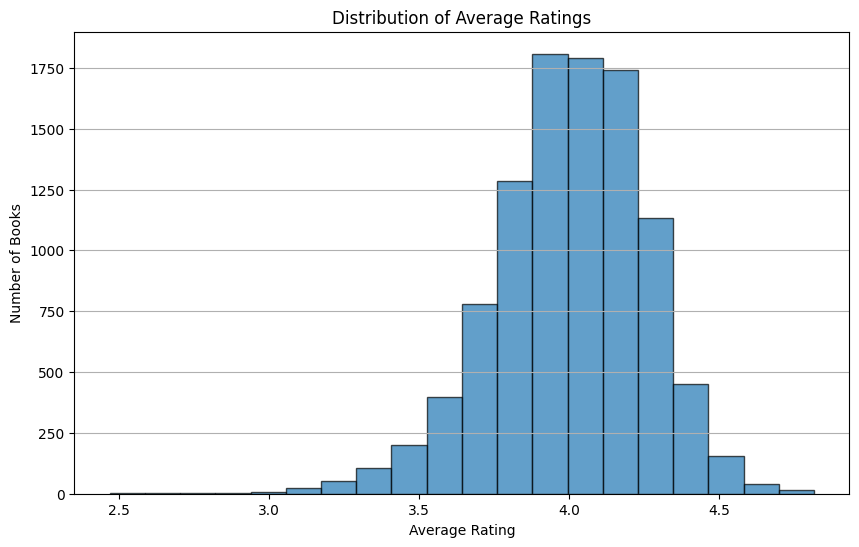

In [15]:
#9. Distribution of Average Ratings
plt.figure(figsize=(10, 6))
plt.hist(df['Average rating'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Books')
plt.grid(axis='y')
plt.show()


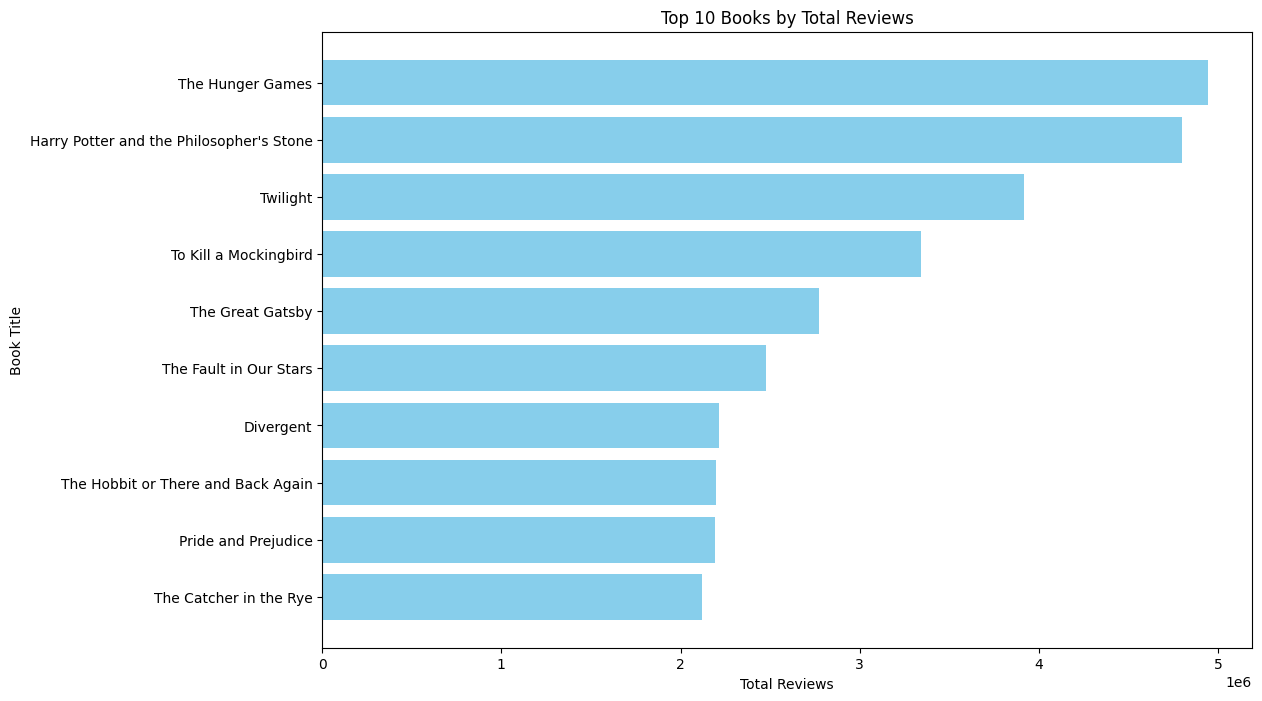

In [16]:
#10. Top 10 Books by Total Reviews
top_10_books = df.nlargest(10, 'Total Reviews')
plt.figure(figsize=(12, 8))
plt.barh(top_10_books['Original Title'], top_10_books['Total Reviews'], color='skyblue')
plt.title('Top 10 Books by Total Reviews')
plt.xlabel('Total Reviews')
plt.ylabel('Book Title')
plt.gca().invert_yaxis()
plt.show()

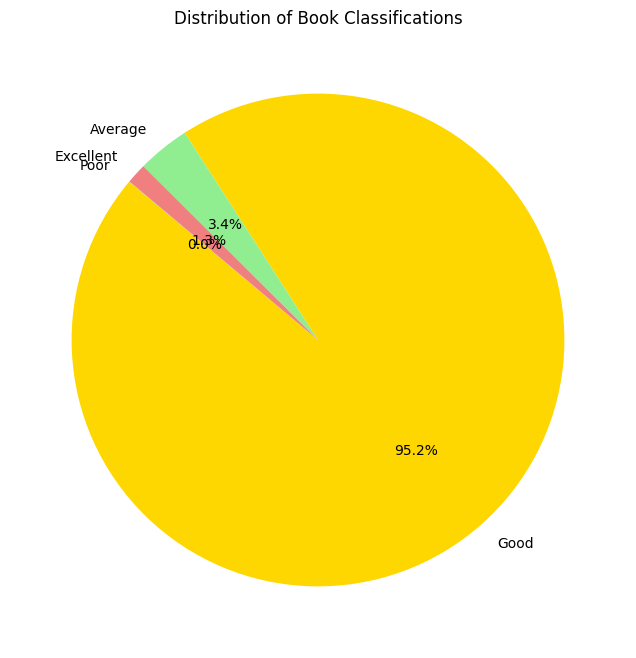

In [17]:
#11. Distribution of Book Classifications
classification_counts = df['Classification'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(classification_counts, labels=classification_counts.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Distribution of Book Classifications')
plt.show()

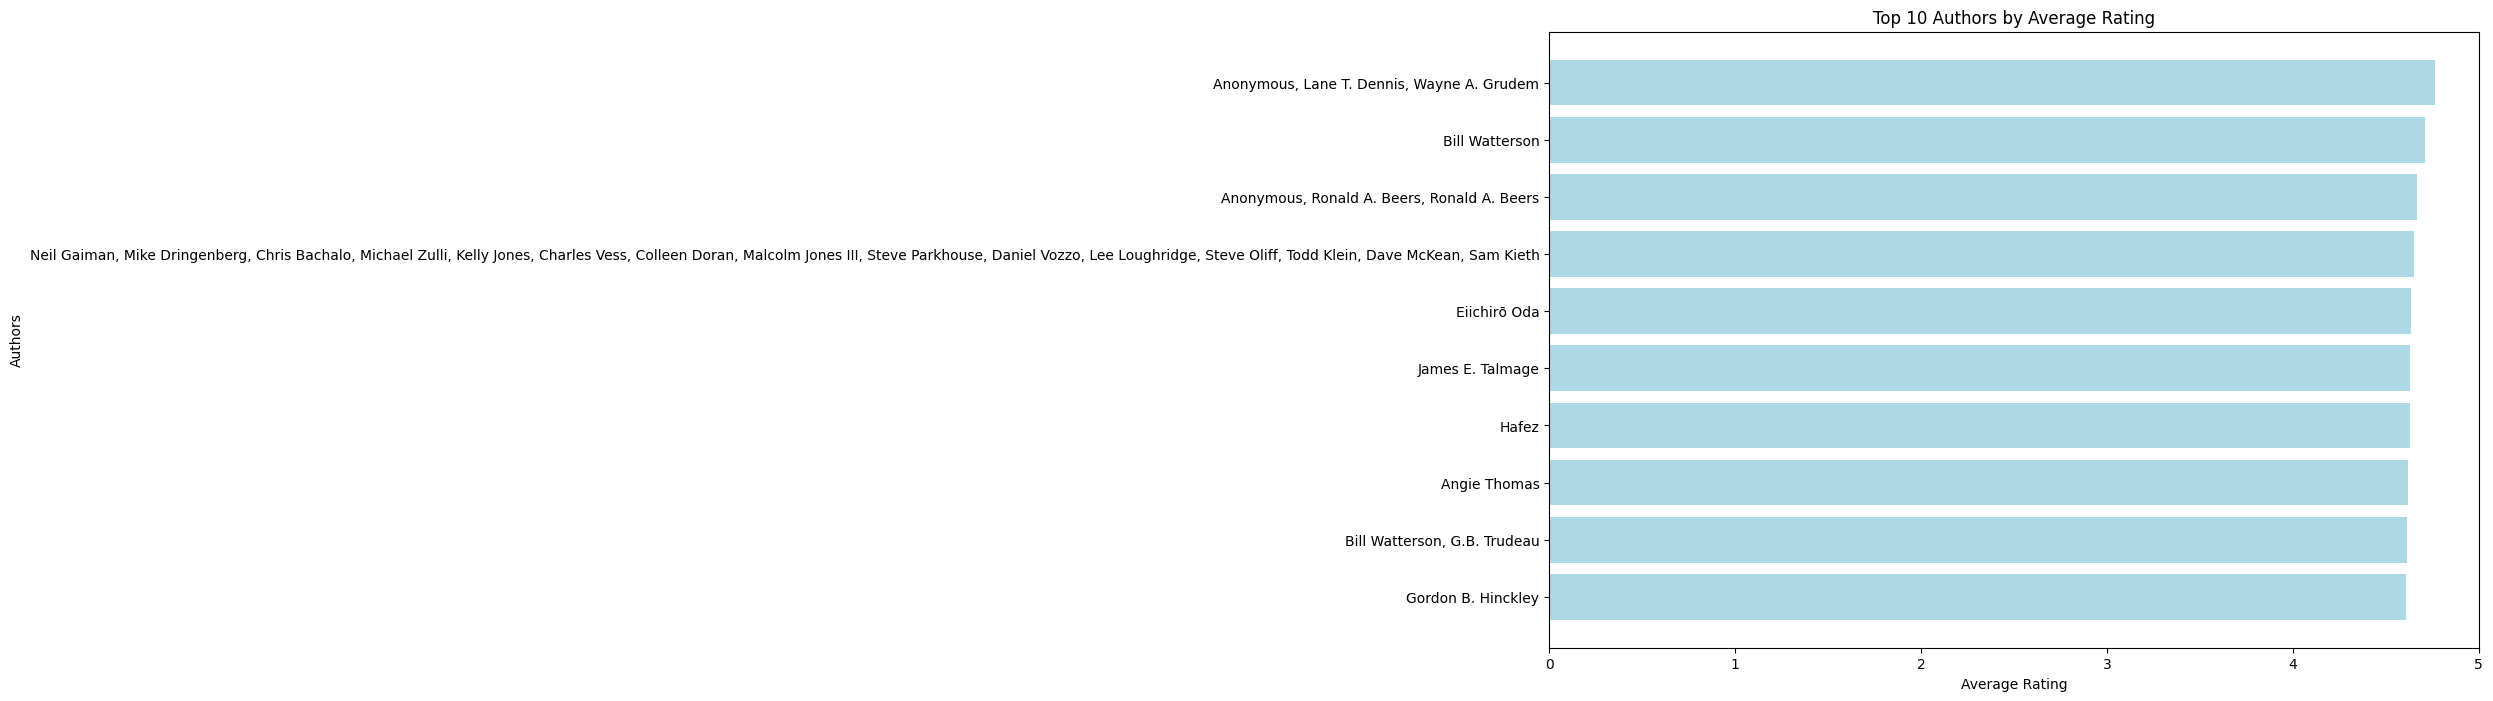

In [18]:
#12. Top Authors by Average Rating (Top 10)
top_10_authors = df.groupby('Authors')['Average rating'].mean().nlargest(10)
plt.figure(figsize=(12, 8))
plt.barh(top_10_authors.index, top_10_authors.values, color='lightblue')
plt.title('Top 10 Authors by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Authors')
plt.gca().invert_yaxis()
plt.show()